In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import cv2 
import os

In [4]:
PLANET_LABELS = {
    'earth': 0,
    'jupiter': 1,
    'mars': 2,
    'mercury': 3,
    'neptune': 4,
    'saturn': 5,
    'uranus': 6,
    'venus': 7
}

def load_dataset(base_path):
    train_images, train_labels = [], []
    valid_images, valid_labels = [], []
    test_images, test_labels = [], []
    class_names = []
    test_class_names = []  # Separate list for test class names

    # Iterate through each main folder (train, valid, test)
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        
        if os.path.isdir(folder_path):
            print(f"Loading data from {folder}...")
            # Iterate through each planet folder
            for planet in os.listdir(folder_path):
                planet_path = os.path.join(folder_path, planet)
                
                if os.path.isdir(planet_path):
                    # Add class name if it hasn't been added before
                    if planet not in class_names:
                        class_names.append(planet)
                    
                    print(f"Processing planet folder: {planet}...")
                    
                    # Iterate through each image in the planet folder
                    for image_file in os.listdir(planet_path):
                        image_path = os.path.join(planet_path, image_file)
                        # Read the image
                        image = cv2.imread(image_path)
                        if image is not None:
                            # Resize image if needed (optional)
                            image = cv2.resize(image, (224, 224))  # Adjust to your model's input size
                            
                            # Determine which set the image belongs to
                            if folder == 'train':
                                train_images.append(image)
                                train_labels.append(PLANET_LABELS[planet])  # Map label using constant labels
                            elif folder == 'valid':
                                valid_images.append(image)
                                valid_labels.append(PLANET_LABELS[planet])  # Map label using constant labels
                            elif folder == 'test':
                                test_images.append(image)
                                test_labels.append(PLANET_LABELS[planet])  # Use constant label for test set
                                if planet not in test_class_names:
                                    test_class_names.append(planet)  # Add to test class names

    return (
        np.array(train_images), np.array(train_labels), 
        np.array(valid_images), np.array(valid_labels), 
        np.array(test_images), np.array(test_labels), 
        class_names, test_class_names
    )

# Define the base path to your dataset
dataset_path = 'G:/React/nasa_app/data'  # Update this path to where your dataset is located

# Load the dataset
train_images, train_labels, valid_images, valid_labels, test_images, test_labels, class_names, test_class_names = load_dataset(dataset_path)

# Display the shapes of the loaded data
print(f'Train: {len(train_images)} images and {len(train_labels)} labels.')
print(f'Validation: {len(valid_images)} images and {len(valid_labels)} labels.')
print(f'Test: {len(test_images)} images and {len(test_labels)} labels.')
print(f'Class names (train/valid): {class_names}')
print(f'Class names (test): {test_class_names}')

Loading data from test...
Processing planet folder: jupiter...
Processing planet folder: mercury...
Processing planet folder: neptune...
Processing planet folder: saturn...
Processing planet folder: uranus...
Processing planet folder: venus...
Loading data from train...
Processing planet folder: earth...
Processing planet folder: jupiter...
Processing planet folder: mars...
Processing planet folder: mercury...
Processing planet folder: neptune...
Processing planet folder: saturn...
Processing planet folder: uranus...
Processing planet folder: venus...
Loading data from valid...
Processing planet folder: earth...
Processing planet folder: jupiter...
Processing planet folder: mars...
Processing planet folder: mercury...
Processing planet folder: neptune...
Processing planet folder: saturn...
Processing planet folder: uranus...
Processing planet folder: venus...
Train: 297 images and 297 labels.
Validation: 101 images and 101 labels.
Test: 8 images and 8 labels.
Class names (train/valid):

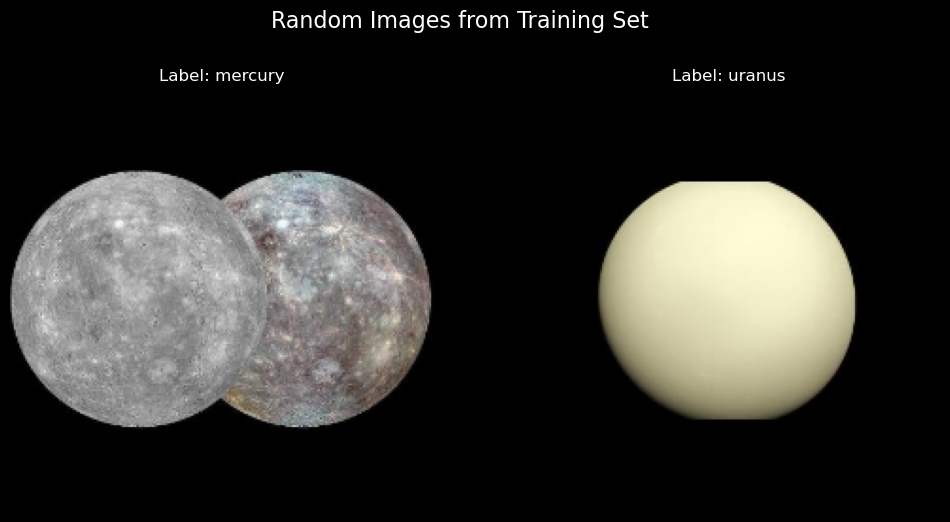

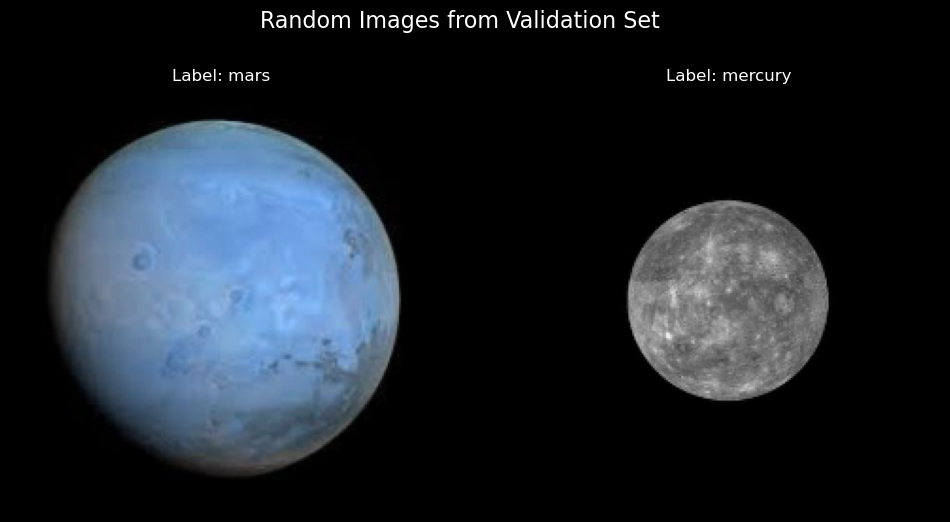

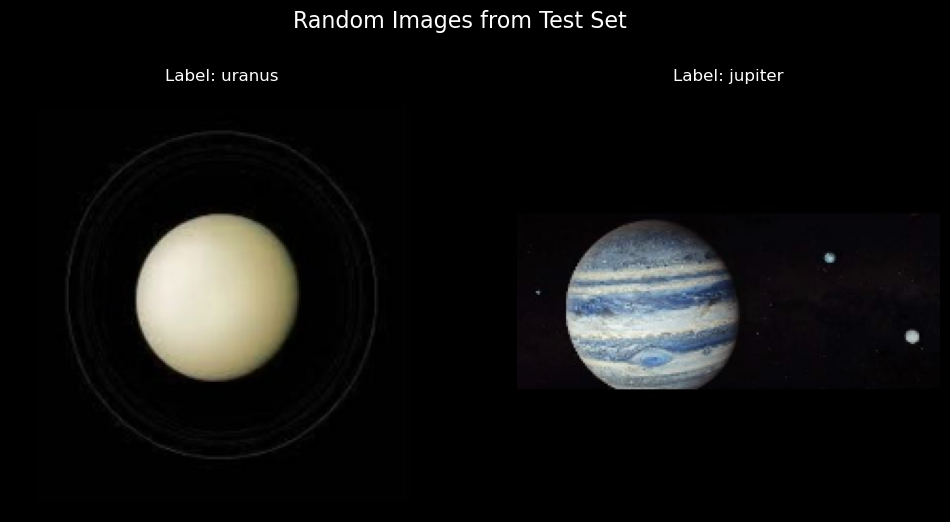

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list of class names defined
class_names = ['earth', 'jupiter', 'mars', 'mercury', 'neptune', 'saturn', 'uranus', 'venus']  # Update this with your actual class names

def plot_random_images(train_images, train_labels, valid_images, valid_labels, test_images, test_labels):
    # Function to plot random images
    def plot_images(images, labels, dataset_name, num_images=2):
        # Select random indices
        random_indices = np.random.choice(len(images), num_images, replace=False)
        
        # Create a figure
        fig, axes = plt.subplots(1, num_images, figsize=(12, 6))
        fig.suptitle(f'Random Images from {dataset_name}', fontsize=16)
        
        for ax, idx in zip(axes, random_indices):
            ax.imshow(images[idx].astype(np.uint8))  # Convert image back to uint8 for display
            ax.set_title(f'Label: {class_names[labels[idx]]}')  # Map numerical label to class name
            ax.axis('off')  # Turn off the axis
        
        plt.show()
    
    # Plot random images from each dataset
    plot_images(train_images, train_labels, 'Training Set')
    plot_images(valid_images, valid_labels, 'Validation Set')
    plot_images(test_images, test_labels, 'Test Set')

# Call the function with your loaded datasets
plot_random_images(train_images, train_labels, valid_images, valid_labels, test_images, test_labels)


In [8]:
def print_shapes(train_images, train_labels, valid_images, valid_labels, test_images, test_labels):
    print(f'Training Images Shape: {train_images.shape}')
    print(f'Training Labels Shape: {train_labels.shape}')
    print(f'Validation Images Shape: {valid_images.shape}')
    print(f'Validation Labels Shape: {valid_labels.shape}')
    print(f'Test Images Shape: {test_images.shape}')
    print(f'Test Labels Shape: {test_labels.shape}')

# Call the function with your loaded datasets
print_shapes(train_images, train_labels, valid_images, valid_labels, test_images, test_labels)

Training Images Shape: (297, 224, 224, 3)
Training Labels Shape: (297,)
Validation Images Shape: (101, 224, 224, 3)
Validation Labels Shape: (101,)
Test Images Shape: (8, 224, 224, 3)
Test Labels Shape: (8,)


In [9]:
train_images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [10]:
def print_image_stats(images_np, dataset_name):
    print(f"{dataset_name} Images:")
    print(f"  Min Pixel Value: {np.min(images_np)}")
    print(f"  Max Pixel Value: {np.max(images_np)}")
    print(f"  Mean Pixel Value: {np.mean(images_np)}")
    print(f"  Std Pixel Value: {np.std(images_np)}")
    print()

# Print stats for train, valid, and test images
print_image_stats(np.array(train_images), "Training")
print_image_stats(np.array(valid_images), "Validation")
print_image_stats(np.array(test_images), "Test")

Training Images:
  Min Pixel Value: 0
  Max Pixel Value: 255
  Mean Pixel Value: 43.45152320845215
  Std Pixel Value: 69.36360625069304

Validation Images:
  Min Pixel Value: 0
  Max Pixel Value: 255
  Mean Pixel Value: 43.949685424138714
  Std Pixel Value: 68.83746705318352

Test Images:
  Min Pixel Value: 0
  Max Pixel Value: 255
  Mean Pixel Value: 33.684087844122026
  Std Pixel Value: 61.077646211749915



In [12]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def normalize_images_in_batches(images, batch_size=16):
    normalized_images = []
    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]
        # Normalize each image by dividing by 255
        normalized_batch = [(image / 255.0) for image in batch]  # Assuming images are NumPy arrays
        normalized_images.extend(normalized_batch)
    return np.array(normalized_images)

# Normalize images in batches without resizing
train_images_np = normalize_images_in_batches(np.array(train_images))
valid_images_np = normalize_images_in_batches(np.array(valid_images))
test_images_np = normalize_images_in_batches(np.array(test_images))

# Print the shapes of the normalized images
print(f'Training Images Normalized Shape: {train_images_np.shape}')
print(f'Validation Images Normalized Shape: {valid_images_np.shape}')
print(f'Test Images Normalized Shape: {test_images_np.shape}')

Training Images Normalized Shape: (297, 224, 224, 3)
Validation Images Normalized Shape: (101, 224, 224, 3)
Test Images Normalized Shape: (8, 224, 224, 3)


In [13]:
def print_image_stats(images_np, dataset_name):
    print(f"{dataset_name} Images:")
    print(f"  Min Pixel Value: {np.min(images_np)}")
    print(f"  Max Pixel Value: {np.max(images_np)}")
    print(f"  Mean Pixel Value: {np.mean(images_np)}")
    print(f"  Std Pixel Value: {np.std(images_np)}")
    print()

# Print stats for train, valid, and test images
print_image_stats(np.array(train_images_np), "Training")
print_image_stats(np.array(valid_images_np), "Validation")
print_image_stats(np.array(test_images_np), "Test")

Training Images:
  Min Pixel Value: 0.0
  Max Pixel Value: 1.0
  Mean Pixel Value: 0.17039813022922423
  Std Pixel Value: 0.2720141421595787

Validation Images:
  Min Pixel Value: 0.0
  Max Pixel Value: 1.0
  Mean Pixel Value: 0.17235170754564233
  Std Pixel Value: 0.2699508511889556

Test Images:
  Min Pixel Value: 0.0
  Max Pixel Value: 1.0
  Mean Pixel Value: 0.13209446213381193
  Std Pixel Value: 0.23952018122254862



In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [15]:
num_classes = len(np.unique(train_labels))

# Load MobileNetV2 without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  # Optional, add more layers if needed
    Dropout(0.5),                   # Regularization
    Dense(num_classes, activation='softmax')  # Final layer for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate as needed
              loss='sparse_categorical_crossentropy',  # For integer class labels
              metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Fit the model
history = model.fit(train_images_np, 
                    train_labels, 
                    validation_data=(valid_images_np, valid_labels), 
                    epochs=20,  # Adjust epochs as needed
                    batch_size=32,  # Adjust batch size as needed
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images_np, test_labels)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1193 - loss: 2.8004 - val_accuracy: 0.1980 - val_loss: 2.0338 - learning_rate: 1.0000e-04
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2018 - loss: 2.2382 - val_accuracy: 0.4257 - val_loss: 1.7263 - learning_rate: 1.0000e-04
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3441 - loss: 1.7940 - val_accuracy: 0.4752 - val_loss: 1.4960 - learning_rate: 1.0000e-04
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4854 - loss: 1.5456 - val_accuracy: 0.6733 - val_loss: 1.3073 - learning_rate: 1.0000e-04
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5288 - loss: 1.3509 - val_accuracy: 0.7129 - val_loss: 1.1432 - learning_rate: 1.0000e-04
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6603 - loss: 1.1397 - val_accuracy: 0.7327 - val_loss: 1.0180 - learning_rate: 1.0000e-04
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6907 - loss:

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2716 - loss: 2.0602 - val_accuracy: 0.4059 - val_loss: 1.6215 - learning_rate: 1.0000e-04
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4118 - loss: 1.6464 - val_accuracy: 0.5347 - val_loss: 1.3457 - learning_rate: 1.0000e-04
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5042 - loss: 1.5156 - val_accuracy: 0.6535 - val_loss: 1.1653 - learning_rate: 1.0000e-04
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5931 - loss: 1.2338 - val_accuracy: 0.7426 - val_loss: 1.0222 - learning_rate: 1.0000e-04
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5725 - loss: 1.2466 - val_accuracy: 0.7921 - val_loss: 0.9191 - learning_rate: 1.0000e-04
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7031 - loss: 1.0474 - val_accuracy: 0.8119 - val_loss: 0.8427 - learning_rate: 1.0000e-04
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6489 - loss:

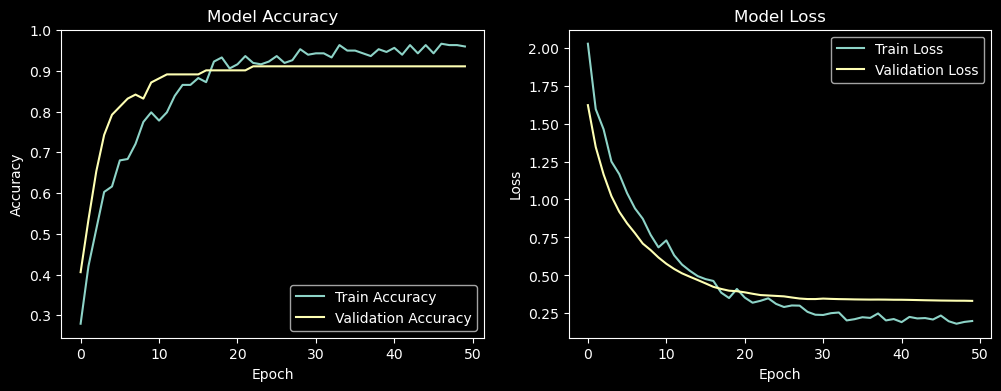

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_classes = len(np.unique(train_labels))

# Load MobileNetV2 without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  # Optional, add more layers if needed
    Dropout(0.5),                   # Regularization
    Dense(num_classes, activation='softmax')  # Final layer for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate as needed
              loss='sparse_categorical_crossentropy',  # For integer class labels
              metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Data augmentation for the training set
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model using data augmentation
history = model.fit(datagen.flow(train_images_np, train_labels, batch_size=32),
                    validation_data=(valid_images_np, valid_labels),
                    epochs=50,  # Adjust epochs as needed
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images_np, test_labels)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [17]:
from sklearn.metrics import precision_score, recall_score
y_true = test_labels # True labels
y_pred = np.argmax(model.predict(test_images_np), axis=1)  # Predicted labels

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision}, Recall: {recall}")
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision: 1.0, Recall: 1.0
F1 Score: 1.0


In [18]:
import joblib

# Save the model using joblib
joblib.dump(model, 'my_model.joblib')

['my_model.joblib']

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(test_images_np), axis=1)

cm = confusion_matrix(test_labels, y_pred)

unique_test_classes = np.unique(test_labels)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

# # Generate classification report
report = classification_report(test_labels, y_pred, target_names=[class_names[i] for i in unique_test_classes])
print("Classification Report:\n", report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Classification Report:
               precision    recall  f1-score   support

     jupiter       1.00      1.00      1.00         1
     mercury       1.00      1.00      1.00         2
     neptune       1.00      1.00      1.00         2
      saturn       1.00      1.00      1.00         1
      uranus       1.00      1.00      1.00         1
       venus       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


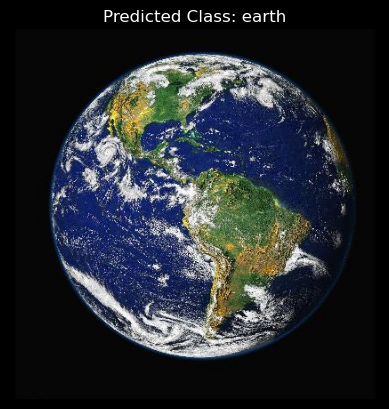

Class Probabilities (as percentages):
Class 0: 99.51%
Class 1: 0.01%
Class 2: 0.18%
Class 3: 0.27%
Class 4: 0.00%
Class 5: 0.01%
Class 6: 0.00%
Class 7: 0.02%


In [23]:
import joblib
import cv2
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the pickled model
model_path = 'G:/React/nasa_app/my_model.joblib'  # Update the path to your pickled model
model = joblib.load(model_path)

def preprocess_image(image_path, target_size=(224, 224)):  # Update target size as needed
    # Load the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image if your model expects it
    return img_array

# Function to predict the class of the image
def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    return prediction  # Return raw prediction probabilities

# Function to display the prediction along with the image
def display_prediction(image_path):
    prediction = predict_image(image_path)
    global reversed_class_mapping
    # Convert probabilities to percentages
    percentages = prediction[0] * 100  # Multiply by 100 to get percentage
    predicted_class_index = np.argmax(prediction, axis=-1)
    
    # Display the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct color display
    plt.imshow(img)
    plt.title(f'Predicted Class: {class_names[predicted_class_index[0]]}')
    plt.axis('off')  # Turn off axis
    plt.show()
    
    # Print class probabilities as percentages
    print("Class Probabilities (as percentages):")
    for i, prob in enumerate(percentages):
        print(f'Class {i}: {prob:.2f}%')
      
  

# Example usage
image_path = 'G:/React/nasa_app/data/train/earth/1-nasa_jpg.rf.47c46912a991e5a570107d2ccf3ed512.jpg'  # Update the path to your saved photo
display_prediction(image_path)
